In [ ]:
#pip install pyarrow

## Business Problem

A retail company, CRISH wants to examine the success of promotional campaigns differs depending on the region where they are implemented. They want to assess the association between region and promotional type.

- The marketing manager is particularly interested in what messaging style and time of day yield the highest conversions so shared additional data to aid with the analysis. The manager explained that this analysis is crucial for guiding future marketing strategies, ensuring that business messages reach potential customers when they're most likely to engage with their campaign hence must be addressed first.

- After exploring the dataset, it was noticed that the dataset gave the outcomes of different messaging styles ('Casual' versus 'Formal') and times of day ('Morning' versus 'Evening') on conversion rates, which is a common scenario in marketing data analysis and the manager confirmed that too.

As the data analyst on the team, how would you go about it?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_feather("marketing_data.feather")
promo_region = pd.read_csv('promotions_region.csv')
df.head()

,Messaging_Style,Time_of_Day,Click_Through_Rate,Conversions
0,Casual,Morning,0.640465,500
1,Formal,Evening,0.698533,598
2,Casual,Morning,0.257834,234
3,Casual,Evening,0.922971,602
4,Casual,Morning,0.476893,314


In [3]:
#print first 5 rows of promotional type data
promo_region.head()

,Region,Promotion_Type
0,South,Loyalty Points
1,Central,Loyalty Points
2,West,Discount
3,East,Free Shipping
4,North,Buy One Get One


In [4]:
# print number of entries
print(df.shape)
print(promo_region.shape)

(950, 4)
(950, 2)


In [5]:
# get additional information
df.info()
promo_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Messaging_Style     950 non-null    object 
 1   Time_of_Day         950 non-null    object 
 2   Click_Through_Rate  950 non-null    float64
 3   Conversions         950 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 29.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region          950 non-null    object
 1   Promotion_Type  950 non-null    object
dtypes: object(2)
memory usage: 15.0+ KB


In [6]:
#checking for nulls
print(df.isnull().sum())
promo_region.isnull().sum()

Messaging_Style       0
Time_of_Day           0
Click_Through_Rate    0
Conversions           0
dtype: int64


Region            0
Promotion_Type    0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

0

In [8]:
#changing dtypes
df['Messaging_Style'] = df['Messaging_Style'].astype('category')
df['Time_of_Day'] = df['Time_of_Day'].astype('category')
promo_region['Region'] = promo_region['Region'].astype('category')
promo_region['Promotion_Type'] = promo_region['Promotion_Type'].astype('category')

In [9]:
#preview info to see changes
df.info()
promo_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Messaging_Style     950 non-null    category
 1   Time_of_Day         950 non-null    category
 2   Click_Through_Rate  950 non-null    float64 
 3   Conversions         950 non-null    int64   
dtypes: category(2), float64(1), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Region          950 non-null    category
 1   Promotion_Type  950 non-null    category
dtypes: category(2)
memory usage: 2.4 KB


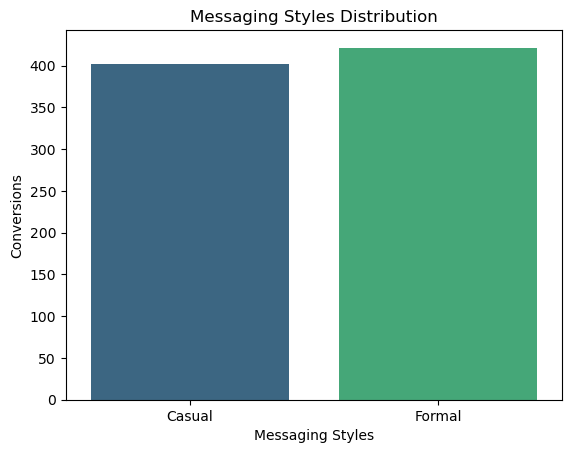

In [10]:
#distribution of messaging styles
g = sns.barplot(data=df, x='Messaging_Style', y='Conversions', palette='viridis', errorbar=None)
g.set_title('Messaging Styles Distribution')
g.set_xlabel('Messaging Styles')
g.set_ylabel('Conversions')
plt.show()

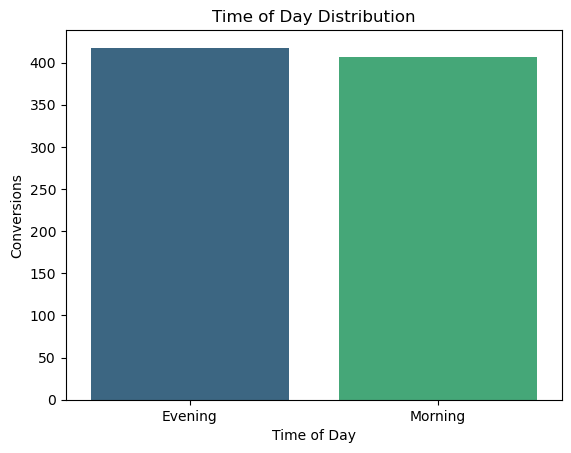

In [11]:
#distribution of time of day by conversions
p = sns.barplot(data=df, x='Time_of_Day', y='Conversions', palette='viridis', errorbar=None)
p.set_title('Time of Day Distribution')
p.set_xlabel('Time of Day')
p.set_ylabel('Conversions')
plt.show()

In [12]:
#summary
marketing_pivot = df.pivot_table(
  values='Conversions', 
  index='Messaging_Style', 
  columns='Time_of_Day', 
  aggfunc='mean')

# View the pivoted results
print(marketing_pivot)

Time_of_Day         Evening     Morning
Messaging_Style                        
Casual           402.329004  401.133891
Formal           432.913043  411.096000


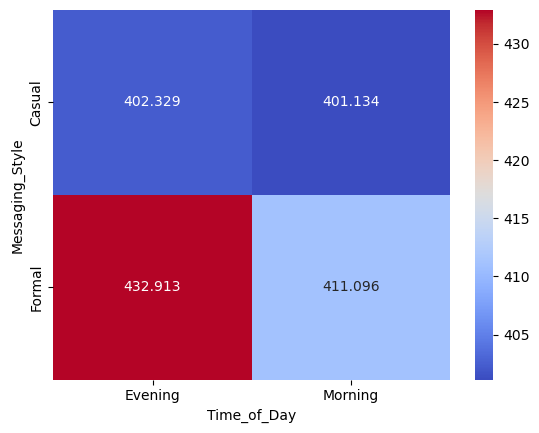

In [13]:
# Visualizing the interactions
sns.heatmap(marketing_pivot, 
         annot=True, 
         cmap='coolwarm',
         fmt='g')

plt.show()

- Based on this, we can easily identify which combinations perform best and which ones need reevaluation.
- A combination of formal messaging style and evening won't work for the business hence needs to be reevaluated.

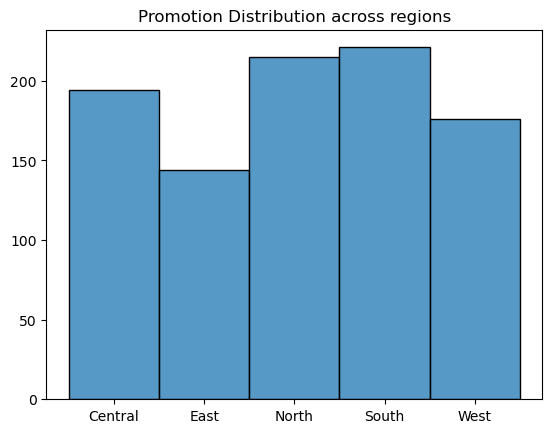

In [14]:
#checking distributions of promotion types across regions
h = sns.histplot(data=promo_region, x='Region')
h.set_title('Promotion Distribution across regions')
plt.ylabel('')
plt.xlabel('')
plt.show()

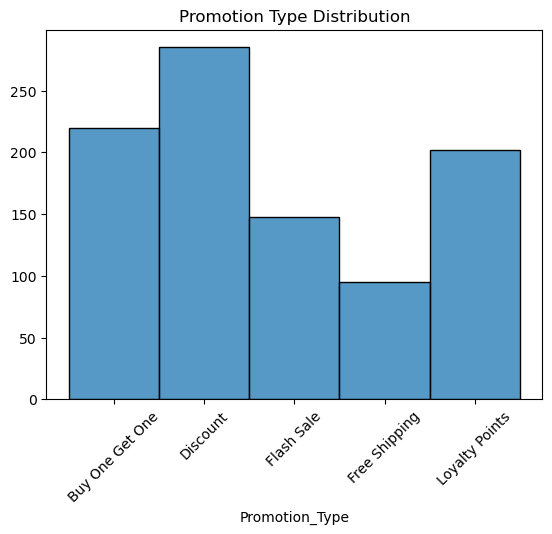

In [15]:
#distribution of promotion types
sort_data = promo_region['Promotion_Type'].value_counts().sort_values(ascending=False)

p = sns.histplot(data=promo_region, x='Promotion_Type')
p.set_title('Promotion Type Distribution')
plt.xticks(rotation=45)
plt.ylabel('')
plt.show()

In [16]:
#checking the association between region and promotional type
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(promo_region['Region'], promo_region['Promotion_Type'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [17]:
#printing chi-square statistic and p-value
print(f"Chi2_statistic: {chi2_stat}, P-value: {p_val}, Degrees of freedom: {dof}")

Chi2_statistic: 18.048085668113195, P-value: 0.32108869291848385, Degrees of freedom: 16
